# Ensemble Training

## Optimized Hyperparameters

| hyperparameter|FP|AIT|FLVL|FLVU|HCOM|
|--------------:|-:|--:|---:|---:|---:|
| hidden_size | 64 | 129 | 256 | 512 | 256 |
| dropout | 0.279 | 0.298 | 0.238 | 0.268 | 0.276 |
| num_layers | 3 | 3 | 4 | 6 | 7 |
| num_timesteps | 5 | 8 | 5 | 1 | 4 |
| lr_init | 0.01 | 0.001 | 0.0001 | 0.0001 | 0.0001 |
| gamma | 0.978 | 0.982 | 0.979 | 0.979 | 0.986 |
| weight_decay | 3.82 $\times$ 10$^{-3}$ | 2.37 $\times$ 10$^{-4}$ | 1.39 $\times$ 10$^{-2}$ | 6.36 $\times$ 10$^{-2}$ | 6.72 $\times$ 10$^{-3}$ |

## Hyperparameter Setting

In [1]:
parameters = dict(
    subfrag_size = 12,
    edge_size = 3,
    out_size = 1,
    seed = 42,
    batch_size = 128,
    max_epoch = 200,
    verbose = False,
    save = False,
    
    target = 'FP',
    hidden_size = 64,
    dropout = 0.279,
    num_layers = 3,
    num_timesteps = 5,
    lr_init = 0.01,
    gamma = 0.978,
    weight_decay = 3.82E-3,
)
DATAPATH = "/SSD2/bgkang/Chemomile"

## Dataset

In [2]:
import sys
sys.path.append(DATAPATH)
from src.data import Dataset

dataset = Dataset(
    target = parameters['target'],
    seed = parameters['seed'],
    batch_size = parameters['batch_size'],
    verbose = parameters['verbose'],
    root = DATAPATH
)

## Ensemble Define

In [3]:
import os
from src.ensemble import EnsembleTraining

ensemble = EnsembleTraining(
    numEnsemble = 8,
    parameters = parameters,
    dataset = dataset,
    root = "../Model")

In [4]:
ensemble.run()

/SSD2/bgkang/.miniconda3/envs/Torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler "
/SSD2/bgkang/.miniconda3/envs/Torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler "
/SSD2/bgkang/.miniconda3/envs/Torch/lib/python3.11/site-

## Test

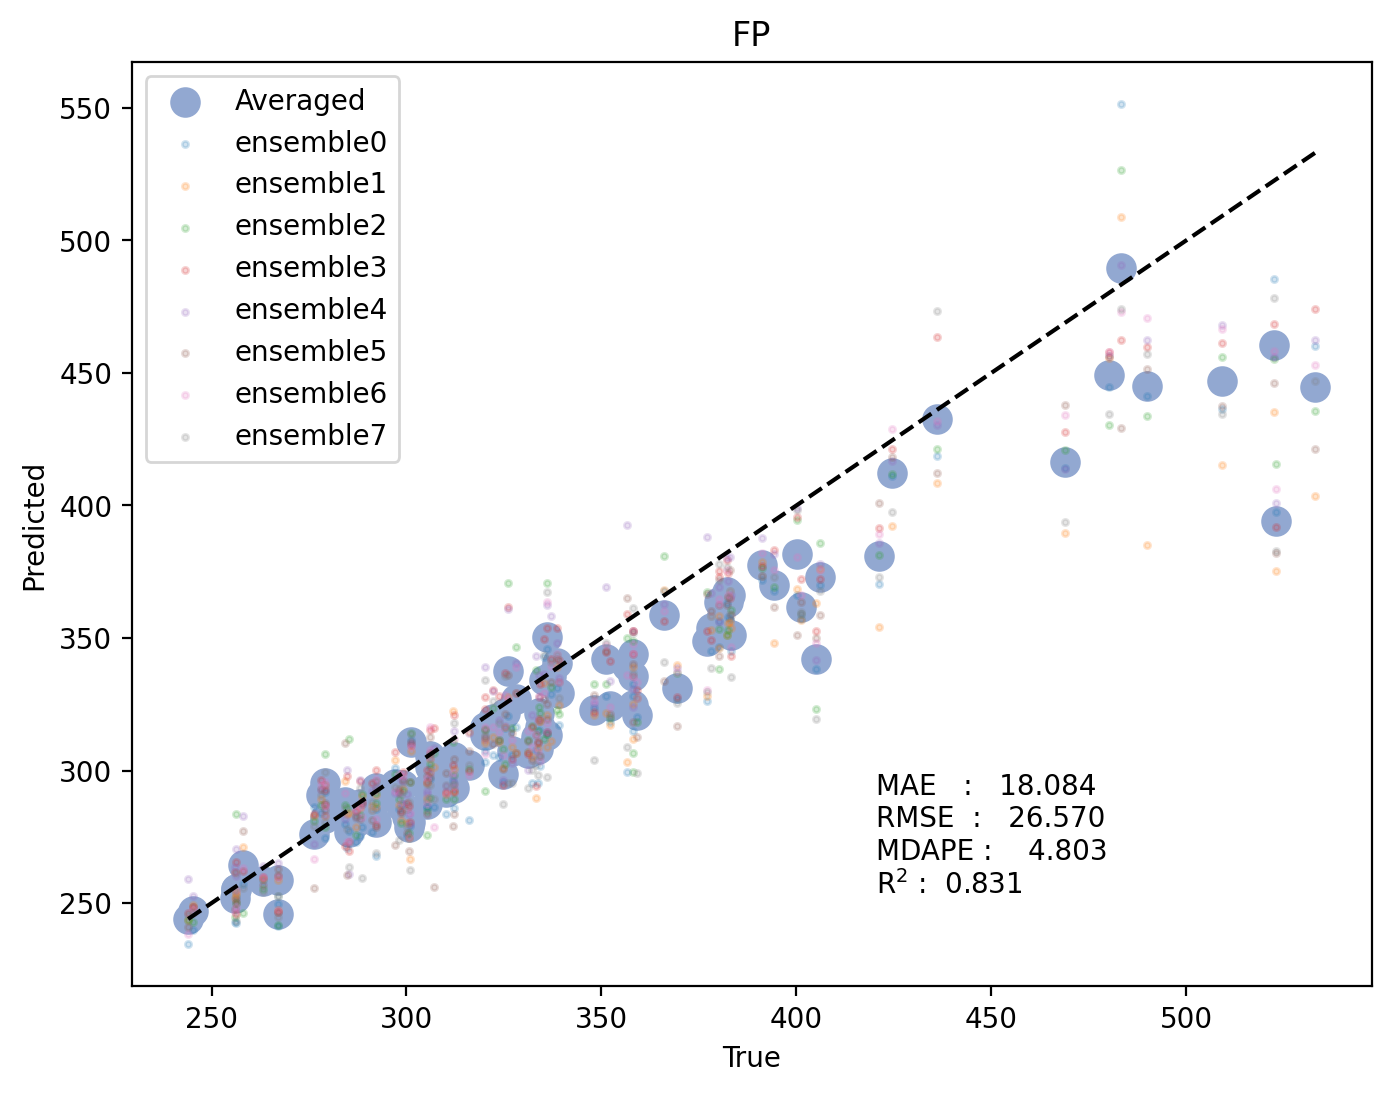

In [5]:
ensemble.TPPlot()